<a href="https://colab.research.google.com/github/mithunkumarsr/ELM_Classification/blob/main/ELM_ICON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
!pip install fasttext

     |████████████████████████████████| 68 kB 2.9 MB/s 
  Using cached pybind11-2.8.0-py2.py3-none-any.whl (207 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3122900 sha256=d49e80e49dc30ddf2dafa97f5413c083b0d2381183c8c5a060dc5868cb548a38
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
import fasttext.util
#fasttext.util.download_model('k#n', if_exists='ignore')
ft = fasttext.load_model('cc.kn.300.bin')

ValueError: ignored

In [ ]:
# pre-trained models for specific language
en_model = KeyedVectors.load_word2vec_format('D:/data/word_embeding/kn/cc.kn.300.vec')

In [ ]:
en_model1 = KeyedVectors.load_word2vec_format('D:/data/word_embeding/en/cc.en.300.vec')

In [ ]:
en_model2 = KeyedVectors.load_word2vec_format('D:/data/word_embeding/cc.ml.300.vec')

In [ ]:
import logging
import pandas as pd
import numpy as np
import gensim
import nltk
import re
from bs4 import BeautifulSoup
import csv
nltk.download('stopwords')

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS =nltk.corpus.stopwords.words('english')

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
df=pd.read_csv('Mal_sentiment_full_test_withlabels.tsv', sep='\t')

In [ ]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
    
    return np.asarray(sent_vec) / numw

In [ ]:
import logging
import pandas as pd
import numpy as np
import gensim
import nltk
import re
from bs4 import BeautifulSoup
import csv

In [ ]:
d=[]
d.append(sent_vectorizer(df['text'][0], en_model))

NameError: ignored

In [ ]:
d=[]
for sent in df["text"]:
    if detect(df['text'][1])=='ml':
        d.append(sent_vectorizer(sent, en_model2))
    else:
        d.append(sent_vectorizer(sent, en_model1))
df1 = pd.DataFrame(d)

In [ ]:
# fast 
fname='fat_ml_test.csv'
df1.to_csv(fname, index=False)

In [ ]:
from langdetect import detect
detect(df['text'][2])

In [ ]:
df=pd.read_csv('kannada_sentiment_full_train.tsv', sep='\t')

In [ ]:
df1=df['category']

In [ ]:
fname='C:/Users/lov/Documents/mithun_new/ka_train_cat.csv'
df1.to_csv(fname, index=False)

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
import math


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
fileloc='C:/Users/lov/Documents/mithun_new/final_data/'

In [ ]:
sm = SMOTE(random_state=42)
for i in range(1,7):
    fname=fileloc+'train'+str(i)+'.csv'
    df=np.genfromtxt(fname,delimiter=',')
    datan=df[:,0:-1]
    out=df[:,-1]
    X_res, y_res = sm.fit_resample(datan,out)
    y=y_res.reshape(-1,1)
    d=np.concatenate((X_res,y),axis=1)
    fname=fileloc+'train'+str(6+i)+".csv"
    np.savetxt(fname,d, delimiter=',', fmt='%f')

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

C:\Users\lov\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\lov\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\lov\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\lov\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=Fut

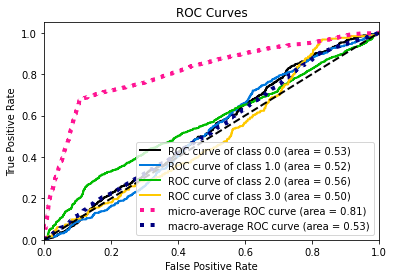

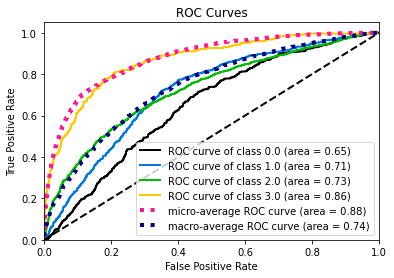

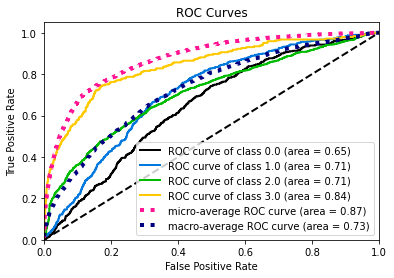

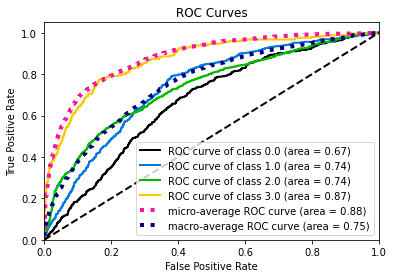

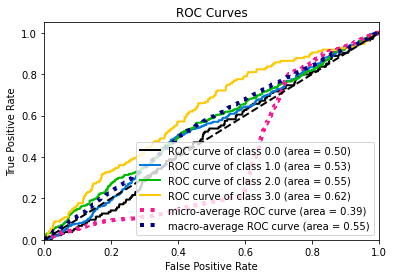

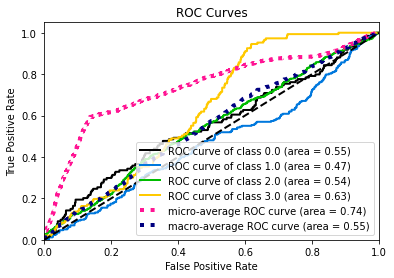

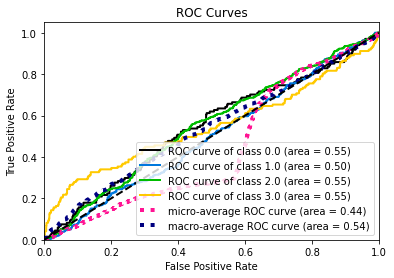

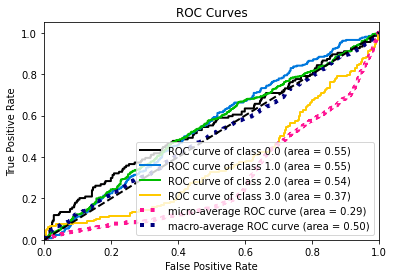

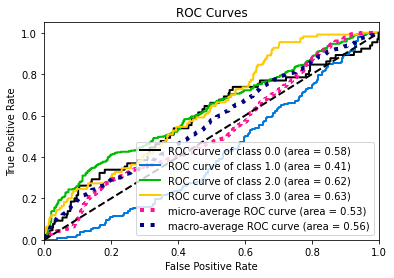

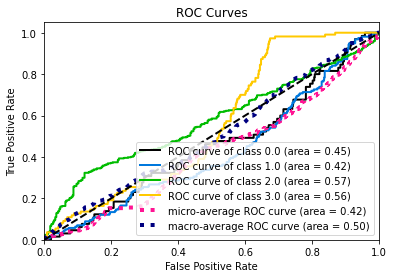

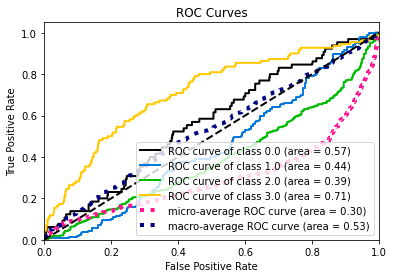

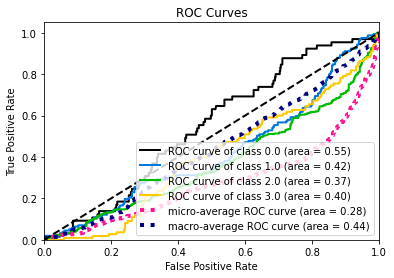

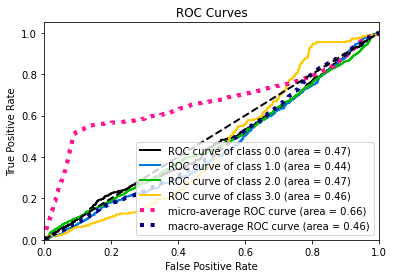

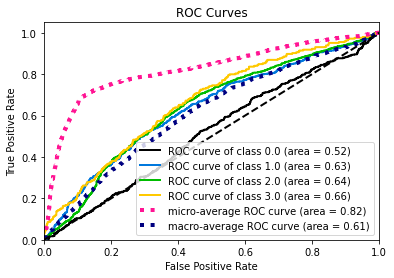

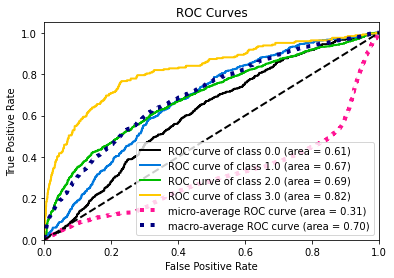

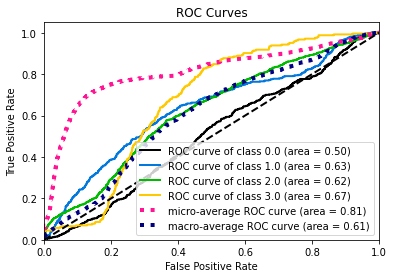

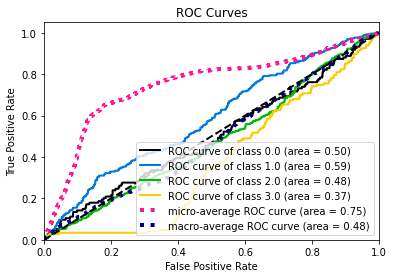

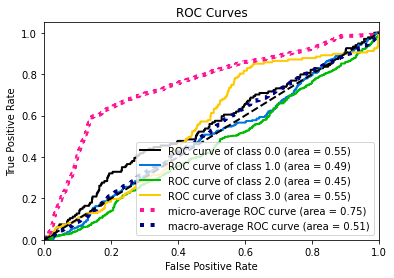

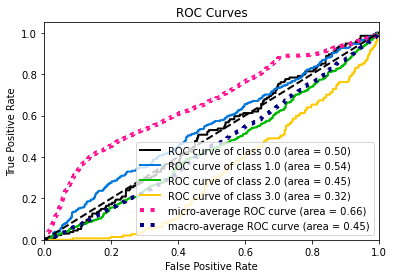

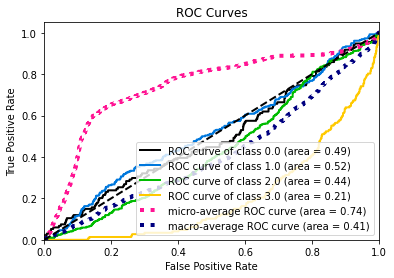

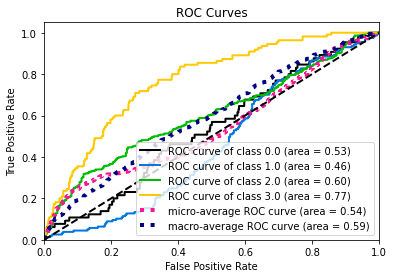

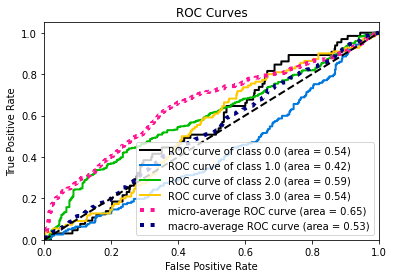

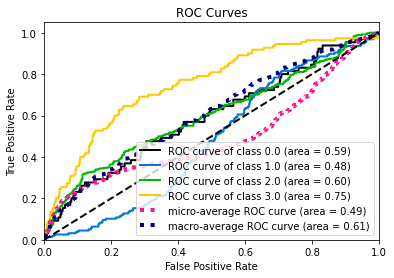

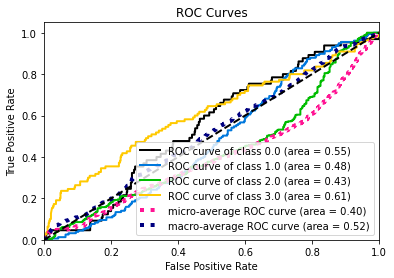

In [ ]:
fileloc='C:/Users/lov/Documents/mithun_new/final_data/'
import matplotlib.pyplot as plt
rocv=np.zeros((6,4))
from sklearn.preprocessing import OneHotEncoder 
import scikitplot as skplt
for i in range(0,6):
    fname= fileloc+str(i+1)+'onep.csv'
    data=np.genfromtxt(fname,delimiter=',')
    y1=data[:,-1]
    enc = OneHotEncoder(sparse=False)
    Y= pd.DataFrame(enc.fit_transform(y1.reshape(-1,1)).tolist())
    Y=Y.iloc[:,:]
    Y=np.array(Y)
    x=y1
    for j in range(0,4):
        fna='C:/Users/lov/Documents/mithun_new/final_data/'+str(i)+'_'+str(j)+".png"
        b=data[:,4*j:4*(j+1)]
        r=np.zeros((5))
        skplt.metrics.plot_roc_curve(x,b)
        plt.savefig(fna)
        for k in range(0,4):
            fpr, tpr, _ = roc_curve(Y[:, k], b[:, k])
            r[k]=auc(fpr, tpr)
        rocv[i,j]=np.mean(r)

In [ ]:
data

array([[-0.51981, -0.7169 ,  0.31721, ...,  0.72667, -1.0131 ,  2.     ],
       [-0.83275, -0.71048,  0.30737, ...,  0.30153, -0.87575,  1.     ],
       [-0.79726, -0.72233,  0.38593, ...,  0.19791, -1.0355 ,  2.     ],
       ...,
       [-0.75969, -0.68873,  0.28703, ...,  0.36048, -0.82798,  0.     ],
       [-0.85477, -0.73357,  0.39326, ...,  0.69133, -1.0872 ,  2.     ],
       [-0.68017, -0.69445,  0.30589, ...,  0.22873, -0.90558,  2.     ]])

In [ ]:
# find the max value from the computed values for prediction of label
from sklearn.metrics import (
    f1_score, precision_score, recall_score,accuracy_score
    )

fval=np.zeros((6,4))
acv=np.zeros((6,4))


for i in range(0,6):
    fname= fileloc+str(i+1)+'onep.csv'
    data=np.genfromtxt(fname,delimiter=',')
    y1=data[:,-1]
    for j in range(0,4):
        b=data[:,4*j:4*(j+1)]
        b1=np.argmax(b,axis=1)
        fval[i,j]=f1_score(y1,b1, average="weighted")
        acv[i,j]=accuracy_score(y1,b1)

In [ ]:
fname=fileloc+'acc.csv'    
np.savetxt(fname,acv, delimiter=',', fmt='%f')  
fname=fileloc+'fmea.csv'     
np.savetxt(fname,fval, delimiter=',', fmt='%f')  
fname=fileloc+'auc.csv'     
np.savetxt(fname,rocv, delimiter=',', fmt='%f')  

In [ ]:
#f-scores
fval

array([[0.55214944, 0.57159387, 0.56403378, 0.57950414],
       [0.02235043, 0.43950312, 0.06400191, 0.02104456],
       [0.29282328, 0.04200689, 0.06912589, 0.0762511 ],
       [0.51671741, 0.55694163, 0.05294278, 0.56138992],
       [0.43950312, 0.43950312, 0.40755158, 0.43950312],
       [0.30127128, 0.41667341, 0.30545037, 0.2283706 ]])

In [ ]:
rocv

array([[0.42505846, 0.59043008, 0.58107241, 0.60184017],
       [0.43893763, 0.43733003, 0.42877043, 0.40128708],
       [0.45028605, 0.40111882, 0.42266784, 0.34776051],
       [0.3669376 , 0.48929932, 0.55894432, 0.48442044],
       [0.38604205, 0.40979822, 0.36299677, 0.33087541],
       [0.47153785, 0.41989615, 0.48348832, 0.41274474]])

In [ ]:
import pandas as pd
import numpy as np



from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_20newsgroups, load_digits
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.pipeline import Pipeline
from skdist.distribute.predict import get_prediction_udf
from pyspark.sql import SparkSession, functions as F



from skdist.distribute.multiclass import (
    DistOneVsRestClassifier,
    DistOneVsOneClassifier
    )
from sklearn.metrics import (
    f1_score, precision_score, recall_score
    )
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from pyspark.sql import SparkSession



spark = (
    SparkSession
    .builder
    .getOrCreate()
    )
sc = spark.sparkContext

In [ ]:
def model5(trdata,tract,tsdata):
    model = DistOneVsRestClassifier(LogisticRegression(solver='lbfgs',max_iter=2000),sc).fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred


def normalizedata(X_train):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    return X_train


def model1(trdata,tract,tsdata):
    model = MultinomialNB()
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

def model2(trdata,tract,tsdata):
    model = BernoulliNB()
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

def model4(trdata,tract,tsdata):
    model = GaussianNB()
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred


def model6(trdata,tract,tsdata):
    model = DistOneVsRestClassifier(DecisionTreeClassifier(),sc).fit(trdata,tract)
    pred= model.predict(tsdata)
    pred1=model.predict_proba(tsdata)
    return pred,pred1

def model7(trdata,tract,tsdata):
    #model=RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1).fit(trdata,tract)
    model = DistOneVsRestClassifier(SVC(probability=True,kernel='linear'),sc).fit(trdata,tract)
    pred= model.predict(tsdata)
    pred1=model.predict_proba(tsdata)
    return pred,pred1

def model8(trdata,tract,tsdata):
    #model=AdaBoostClassifier().fit(trdata,tract)
    model = DistOneVsRestClassifier(SVC(probability=True,kernel='poly'),sc).fit(trdata,tract)
    pred= model.predict(tsdata)
    pred1=model.predict_proba(tsdata)
    return pred,pred1

def model9(trdata,tract,tsdata):
    model = DistOneVsRestClassifier(SVC(probability=True,kernel='rbf'),sc).fit(trdata,tract)
    pred= model.predict(tsdata)
    pred1=model.predict_proba(tsdata)
    return pred,pred1

def model10(trdata,tract,tsdata):
    model = DistOneVsRestClassifier(MLPClassifier(solver='lbfgs', hidden_layer_sizes=(trdata.shape[1], 2), random_state=1,max_iter=500),sc).fit(trdata,tract)
    pred= model.predict(tsdata)
    pred1=model.predict_proba(tsdata)
    return pred,pred1

def model11(trdata,tract,tsdata):
    model = DistOneVsRestClassifier(MLPClassifier(solver='sgd', hidden_layer_sizes=(trdata.shape[1], 2), random_state=1,max_iter=500),sc).fit(trdata,tract)
    pred= model.predict(tsdata)
    pred1=model.predict_proba(tsdata)
    return pred,pred1

def model12(trdata,tract,tsdata):
    model = DistOneVsRestClassifier(MLPClassifier(solver='adam', hidden_layer_sizes=(trdata.shape[1], 2), random_state=1,max_iter=500),sc).fit(trdata,tract)
    pred= model.predict(tsdata)
    pred1=model.predict_proba(tsdata)
    return pred,pred1

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(3)
for i in range(0,6):
    print(i)
    fname='C:/Users/lov/Documents/mithun_new/final_data/train'+str(i+1)+'.csv'
    data=np.genfromtxt(fname,delimiter=',')
    np.random.shuffle(data)
    data=data[0:4500,:]
    
    fname='C:/Users/lov/Documents/mithun_new/final_data/test'+str(i+1)+'.csv'
    data1=np.genfromtxt(fname,delimiter=',')
    

    trdata=data[:,0:-1]
    tract=data[:,-1]
    tsdata=data1[:,0:-1]
    tsact=data1[:,-1]
    predvalue=np.zeros((np.shape(tsdata)[0],8))
    predvalue1=np.zeros((np.shape(tsdata)[0],29))
    #predvalue[:,0]=model1(trdata,tract,tsdata)
    #predvalue[:,1]=model2(trdata,tract,tsdata)
    #predvalue[:,2]=model4(trdata,tract,tsdata)
    #predvalue[:,3]=model5(trdata,tract,tsdata)
    predvalue[:,0],predvalue1[:,0:4]=model6(trdata,tract,tsdata)
    predvalue[:,1],predvalue1[:,4:8]=model7(trdata,tract,tsdata)
    predvalue[:,2],predvalue1[:,8:12]=model8(trdata,tract,tsdata)
    predvalue[:,3],predvalue1[:,12:16]=model9(trdata,tract,tsdata)
    predvalue[:,4],predvalue1[:,16:20]=model10(trdata,tract,tsdata)
    predvalue[:,5],predvalue1[:,20:24]=model11(trdata,tract,tsdata)
    predvalue[:,6],predvalue1[:,24:28]=model12(trdata,tract,tsdata)
    predvalue[:,7]=tsact
    predvalue1[:,28]=tsact
    fname=fileloc+'class'+str(i+1)+".csv"
    np.savetxt(fname,predvalue, delimiter=',', fmt='%f')
    fname=fileloc+'classp'+str(i+1)+".csv"
    np.savetxt(fname,predvalue, delimiter=',', fmt='%f')

0


In [ ]:
model7(trdata,tract,tsdata)

(array([2., 2., 2., ..., 2., 2., 2.]),
 array([[0.13293437, 0.15101034, 0.73177958, 0.05274046],
        [0.13299313, 0.15368194, 0.75384468, 0.0527115 ],
        [0.13296161, 0.1567522 , 0.6781554 , 0.0527679 ],
        ...,
        [0.13258718, 0.1339782 , 0.80008248, 0.04034744],
        [0.13278897, 0.14566446, 0.67524559, 0.04214543],
        [0.16200977, 0.08007409, 0.00619544, 0.15026722]]))

In [ ]:
fname='C:/Users/lov/Documents/mithun_new/final_data/train'+str(i+1)+'.csv'
data=np.genfromtxt(fname,delimiter=',')

In [ ]:
np.random.shuffle(data)

In [ ]:
data[:,-1]

array([2., 2., 2., ..., 1., 2., 2.])

In [ ]:
from sklearn.metrics import (
    f1_score, precision_score, recall_score,accuracy_score
    )

fval=np.zeros((6,12))
acv=np.zeros((6,12))


for i in range(0,6):
    fname= fileloc+'class'+str(i+1)+'.csv'
    data=np.genfromtxt(fname,delimiter=',')
    y1=data[:,-1]
    for j in range(0,12):
        b=data[:,j]
        fval[i,j]=f1_score(y1,b, average="weighted")
        acv[i,j]=accuracy_score(y1,b)

array([[0.03236356, 0.03236356, 0.09112963, 0.55482476, 1.        ,
        0.5428247 , 0.5428247 , 0.54230928, 0.59511942, 0.54230928,
        0.79315372, 1.        ],
       [0.01368831, 0.01368831, 0.13718576, 0.52239442, 0.99754543,
        0.51434663, 0.4858543 , 0.4914737 , 0.63355219, 0.51444863,
        0.78669044, 1.        ],
       [0.01975408, 0.01975408, 0.43111955, 0.47113463, 0.98981299,
        0.46383352, 0.49840224, 0.49821431, 0.7627749 , 0.48593138,
        0.90689907, 1.        ],
       [0.03625175, 0.03625175, 0.53072213, 0.52980544, 0.99955569,
        0.5253054 , 0.52589328, 0.52543058, 0.51944711, 0.51944711,
        0.51996059, 1.        ],
       [0.01550183, 0.01550183, 0.47006098, 0.4926606 , 0.99866696,
        0.47623125, 0.47756788, 0.48658807, 0.61020913, 0.49113511,
        0.58043371, 1.        ],
       [0.019995  , 0.019995  , 0.46612325, 0.45997183, 0.99026744,
        0.44064775, 0.58347116, 0.58979393, 0.69154387, 0.34875344,
        0.78204763,

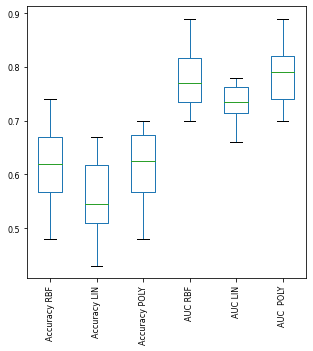

In [5]:
import pandas as pd

#add csv file to dataframe
boxplotData = pd.read_csv('metricsICON.csv')
boxplot = boxplotData.boxplot(figsize = (5,5), rot = 90, fontsize= '8', grid = False)

In [3]:
boxplotData.head()

,Accuracy\r\nRBF,Accuracy\r\nLIN,Accuracy\r\nPOLY,AUC\r\nRBF,AUC\r\nLIN,AUC \r\nPOLY
0,0.67,0.67,0.68,0.72,0.72,0.75
1,0.67,0.67,0.67,0.70,0.68,0.71
2,0.56,0.51,0.57,0.79,0.76,0.80
3,0.49,0.46,0.49,0.74,0.72,0.74
4,0.67,0.64,0.67,0.76,0.74,0.81


In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Creating dataset
np.random.seed(10)
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00',
		'#FFFF00', '#FF00FF']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['data_1', 'data_2',
					'data_3', 'data_4'])

# Adding title
plt.title("Customized box plot")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show(bp)
